In [1]:
import scanpy as sc

In [2]:
import cellbin_moran as cm

In [3]:
import os

In [4]:
os.chdir("./st_project")

In [5]:
os.listdir()

['IO_test.ipynb',
 'playground.ipynb',
 'tacco',
 'region_map.txt',
 'sn_analysis',
 'ann_convert',
 'env',
 'cellbin_analysis',
 'adjusted_cellbins',
 'Learn',
 'bin50_analysis',
 'nohup.out',
 'downloads',
 '.ipynb_checkpoints',
 'help_senior_1']

In [6]:
os.chdir("./cellbin_analysis/cluster_moranI/sup_analysis")

In [7]:
os.getcwd()

'/public/home/jijh/st_project/cellbin_analysis/cluster_moranI/sup_analysis'

In [8]:
files = cm.io.list_files_matching_criteria('/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony', 
                                           condition = "'coo' in file and 'h5ad' in file", separator='.')

In [9]:
files

{'HZ12M01_coorect_BF_regress_harmony_cellbin': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/HZ12M01_coorect_BF_regress_harmony_cellbin.h5ad',
 'HZ12M01_coorect_PFC_regress_harmony_cellbin': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/HZ12M01_coorect_PFC_regress_harmony_cellbin.h5ad',
 'HZ12M01_coorect_STR_regress_harmony_cellbin': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/HZ12M01_coorect_STR_regress_harmony_cellbin.h5ad',
 'HZ12M02_coorect_BF_regress_harmony_cellbin': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/HZ12M02_coorect_BF_regress_harmony_cellbin.h5ad',
 'HZ12M02_coorect_ECT_regress_harmony_cellbin': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/HZ12M02_coorect_ECT_regress_harmony_cellbin.h5ad',
 'HZ12M02_coorect_HPF_regress_harmony_cellbin': '/public/home/jijh/st_project/cellbin_analysis

# QC  UMAP

In [10]:
subpal_data = {}

for key, path in files.items():
    if 'BF' in key or 'STR' in key:
        print(key)
        subpal_data[key] = sc.read_h5ad(path)
        if '01' in key or '03' in key or '05' in key:
            print(key)
            subpal_data[key] = sc.read_h5ad(path)


HZ12M01_coorect_BF_regress_harmony_cellbin
HZ12M01_coorect_BF_regress_harmony_cellbin
HZ12M01_coorect_STR_regress_harmony_cellbin
HZ12M01_coorect_STR_regress_harmony_cellbin
HZ12M02_coorect_BF_regress_harmony_cellbin
HZ12M03_coorect_BF_regress_harmony_cellbin
HZ12M03_coorect_BF_regress_harmony_cellbin
HZ12M03_coorect_STR_regress_harmony_cellbin
HZ12M03_coorect_STR_regress_harmony_cellbin
HZ12M04_coorect_BF_regress_harmony_cellbin
HZ12M05_coorect_BF_regress_harmony_cellbin
HZ12M05_coorect_BF_regress_harmony_cellbin
HZ12M05_coorect_STR_regress_harmony_cellbin
HZ12M05_coorect_STR_regress_harmony_cellbin
HZ12M06_coorect_BF_regress_harmony_cellbin
HZ2M01_coorect_BF_regress_harmony_cellbin
HZ2M01_coorect_BF_regress_harmony_cellbin
HZ2M01_coorect_STR_regress_harmony_cellbin
HZ2M01_coorect_STR_regress_harmony_cellbin
HZ2M02_coorect_BF_regress_harmony_cellbin
HZ2M03_coorect_BF_regress_harmony_cellbin
HZ2M03_coorect_BF_regress_harmony_cellbin
HZ2M03_coorect_STR_regress_harmony_cellbin
HZ2M03_coo

In [12]:
import numpy as np

In [13]:
from matplotlib import pyplot as plt

In [14]:
subpal_data.keys()

dict_keys(['HZ12M01_coorect_BF_regress_harmony_cellbin', 'HZ12M01_coorect_STR_regress_harmony_cellbin', 'HZ12M02_coorect_BF_regress_harmony_cellbin', 'HZ12M03_coorect_BF_regress_harmony_cellbin', 'HZ12M03_coorect_STR_regress_harmony_cellbin', 'HZ12M04_coorect_BF_regress_harmony_cellbin', 'HZ12M05_coorect_BF_regress_harmony_cellbin', 'HZ12M05_coorect_STR_regress_harmony_cellbin', 'HZ12M06_coorect_BF_regress_harmony_cellbin', 'HZ2M01_coorect_BF_regress_harmony_cellbin', 'HZ2M01_coorect_STR_regress_harmony_cellbin', 'HZ2M02_coorect_BF_regress_harmony_cellbin', 'HZ2M03_coorect_BF_regress_harmony_cellbin', 'HZ2M03_coorect_STR_regress_harmony_cellbin', 'HZ2M04_coorect_BF_regress_harmony_cellbin', 'HZ2M05_coorect_BF_regress_harmony_cellbin', 'HZ2M05_coorect_STR_regress_harmony_cellbin', 'HZ2M06_coorect_BF_regress_harmony_cellbin', 'HZ3M01_coorect_BF_regress_harmony_cellbin', 'HZ3M01_coorect_STR_regress_harmony_cellbin', 'HZ3M02_coorect_BF_regress_harmony_cellbin', 'HZ3M03_coorect_BF_regress_h

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


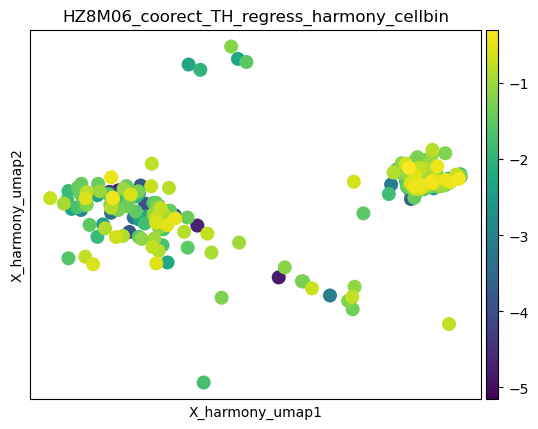

In [16]:
adata = subpal_data['HZ12M03_coorect_BF_regress_harmony_cellbin'].copy()
mask = adata.obs['fine'] == 'Micro-2'
max_dist = adata.obs['min_center_dist'].max()
min_dist = adata.obs['min_center_dist'].min()
adata.obs['minmax_dist'] = adata.obs['min_center_dist'].apply(lambda x: (x - min_dist) / (max_dist - min_dist))
adata.obs['log_minmax_dist'] = np.log(adata.obs['minmax_dist'])
fig, ax = plt.subplots()
sc.pl.embedding(adata[mask], basis='X_harmony_umap', color='log_minmax_dist', title=key, ax=ax)
ax.set_aspect('equal', 'box')
plt.show()

In [19]:
adata = subpal_data['HZ12M01_coorect_BF_regress_harmony_cellbin'].copy()

In [21]:
import seaborn as sns

<Axes: xlabel='min_center_dist', ylabel='Density'>

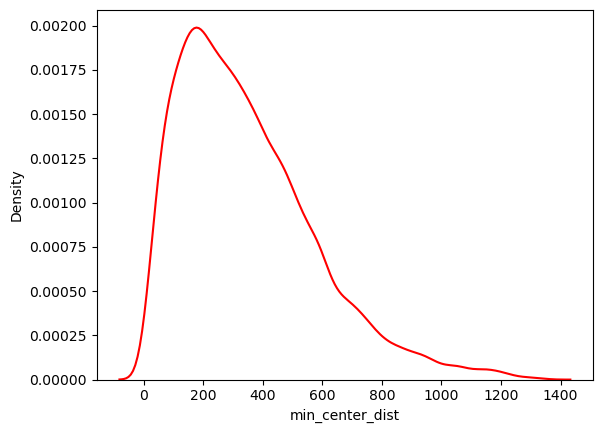

In [38]:
sns.kdeplot(adata.obs['min_center_dist'], color='r', label='HZ12M01')

<Axes: xlabel='log_minmax_dist', ylabel='Density'>

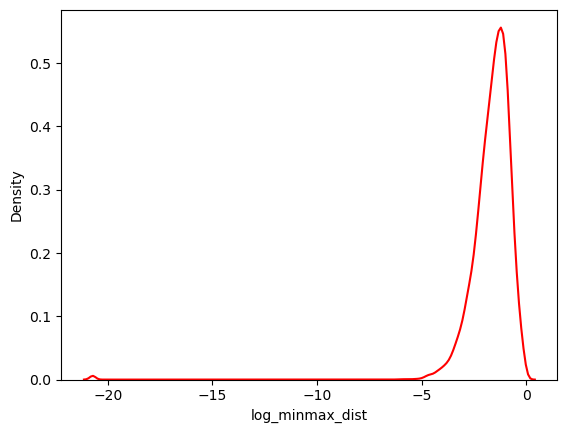

In [37]:
sns.kdeplot(adata.obs['log_minmax_dist'], color='r', label='HZ12M01')

In [30]:
adata.obs['nearby_label'].unique()

['unlabeled', 'near_Olig', 'near_ExN', 'near_InN', 'near_Micro', ..., 'near_Peri', 'near_Astro', 'near_SMC', 'near_Endo', 'near_MSN']
Length: 11
Categories (11, object): ['near_Astro', 'near_Endo', 'near_ExN', 'near_InN', ..., 'near_Olig', 'near_Peri', 'near_SMC', 'unlabeled']

In [58]:
from pyfonts import load_font

In [62]:
font = load_font(font_url='https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf?raw=true')

In [63]:
font

In [66]:
import matplotlib

In [67]:
matplotlib.rcParams['pdf.fonttype'] = 42 

2024-09-29 00:39:13,594 - INFO - maxp pruned
2024-09-29 00:39:13,617 - INFO - cmap pruned
2024-09-29 00:39:13,619 - INFO - kern dropped
2024-09-29 00:39:13,620 - INFO - post pruned
2024-09-29 00:39:13,621 - INFO - FFTM dropped
2024-09-29 00:39:13,626 - INFO - GPOS pruned
2024-09-29 00:39:13,634 - INFO - GSUB pruned
2024-09-29 00:39:13,662 - INFO - glyf pruned
2024-09-29 00:39:13,665 - INFO - Added gid0 to subset
2024-09-29 00:39:13,666 - INFO - Added first four glyphs to subset
2024-09-29 00:39:13,669 - INFO - Closing glyph list over 'GSUB': 12 glyphs before
2024-09-29 00:39:13,670 - INFO - Glyph names: ['.notdef', '.null', 'five', 'four', 'minus', 'nonmarkingreturn', 'one', 'period', 'space', 'three', 'two', 'zero']
2024-09-29 00:39:13,674 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 3228]
2024-09-29 00:39:13,678 - INFO - Closed glyph list over 'GSUB': 12 glyphs after
2024-09-29 00:39:13,680 - INFO - Glyph names: ['.notdef', '.null', 'five', 'four', 'minus', 'nonmark

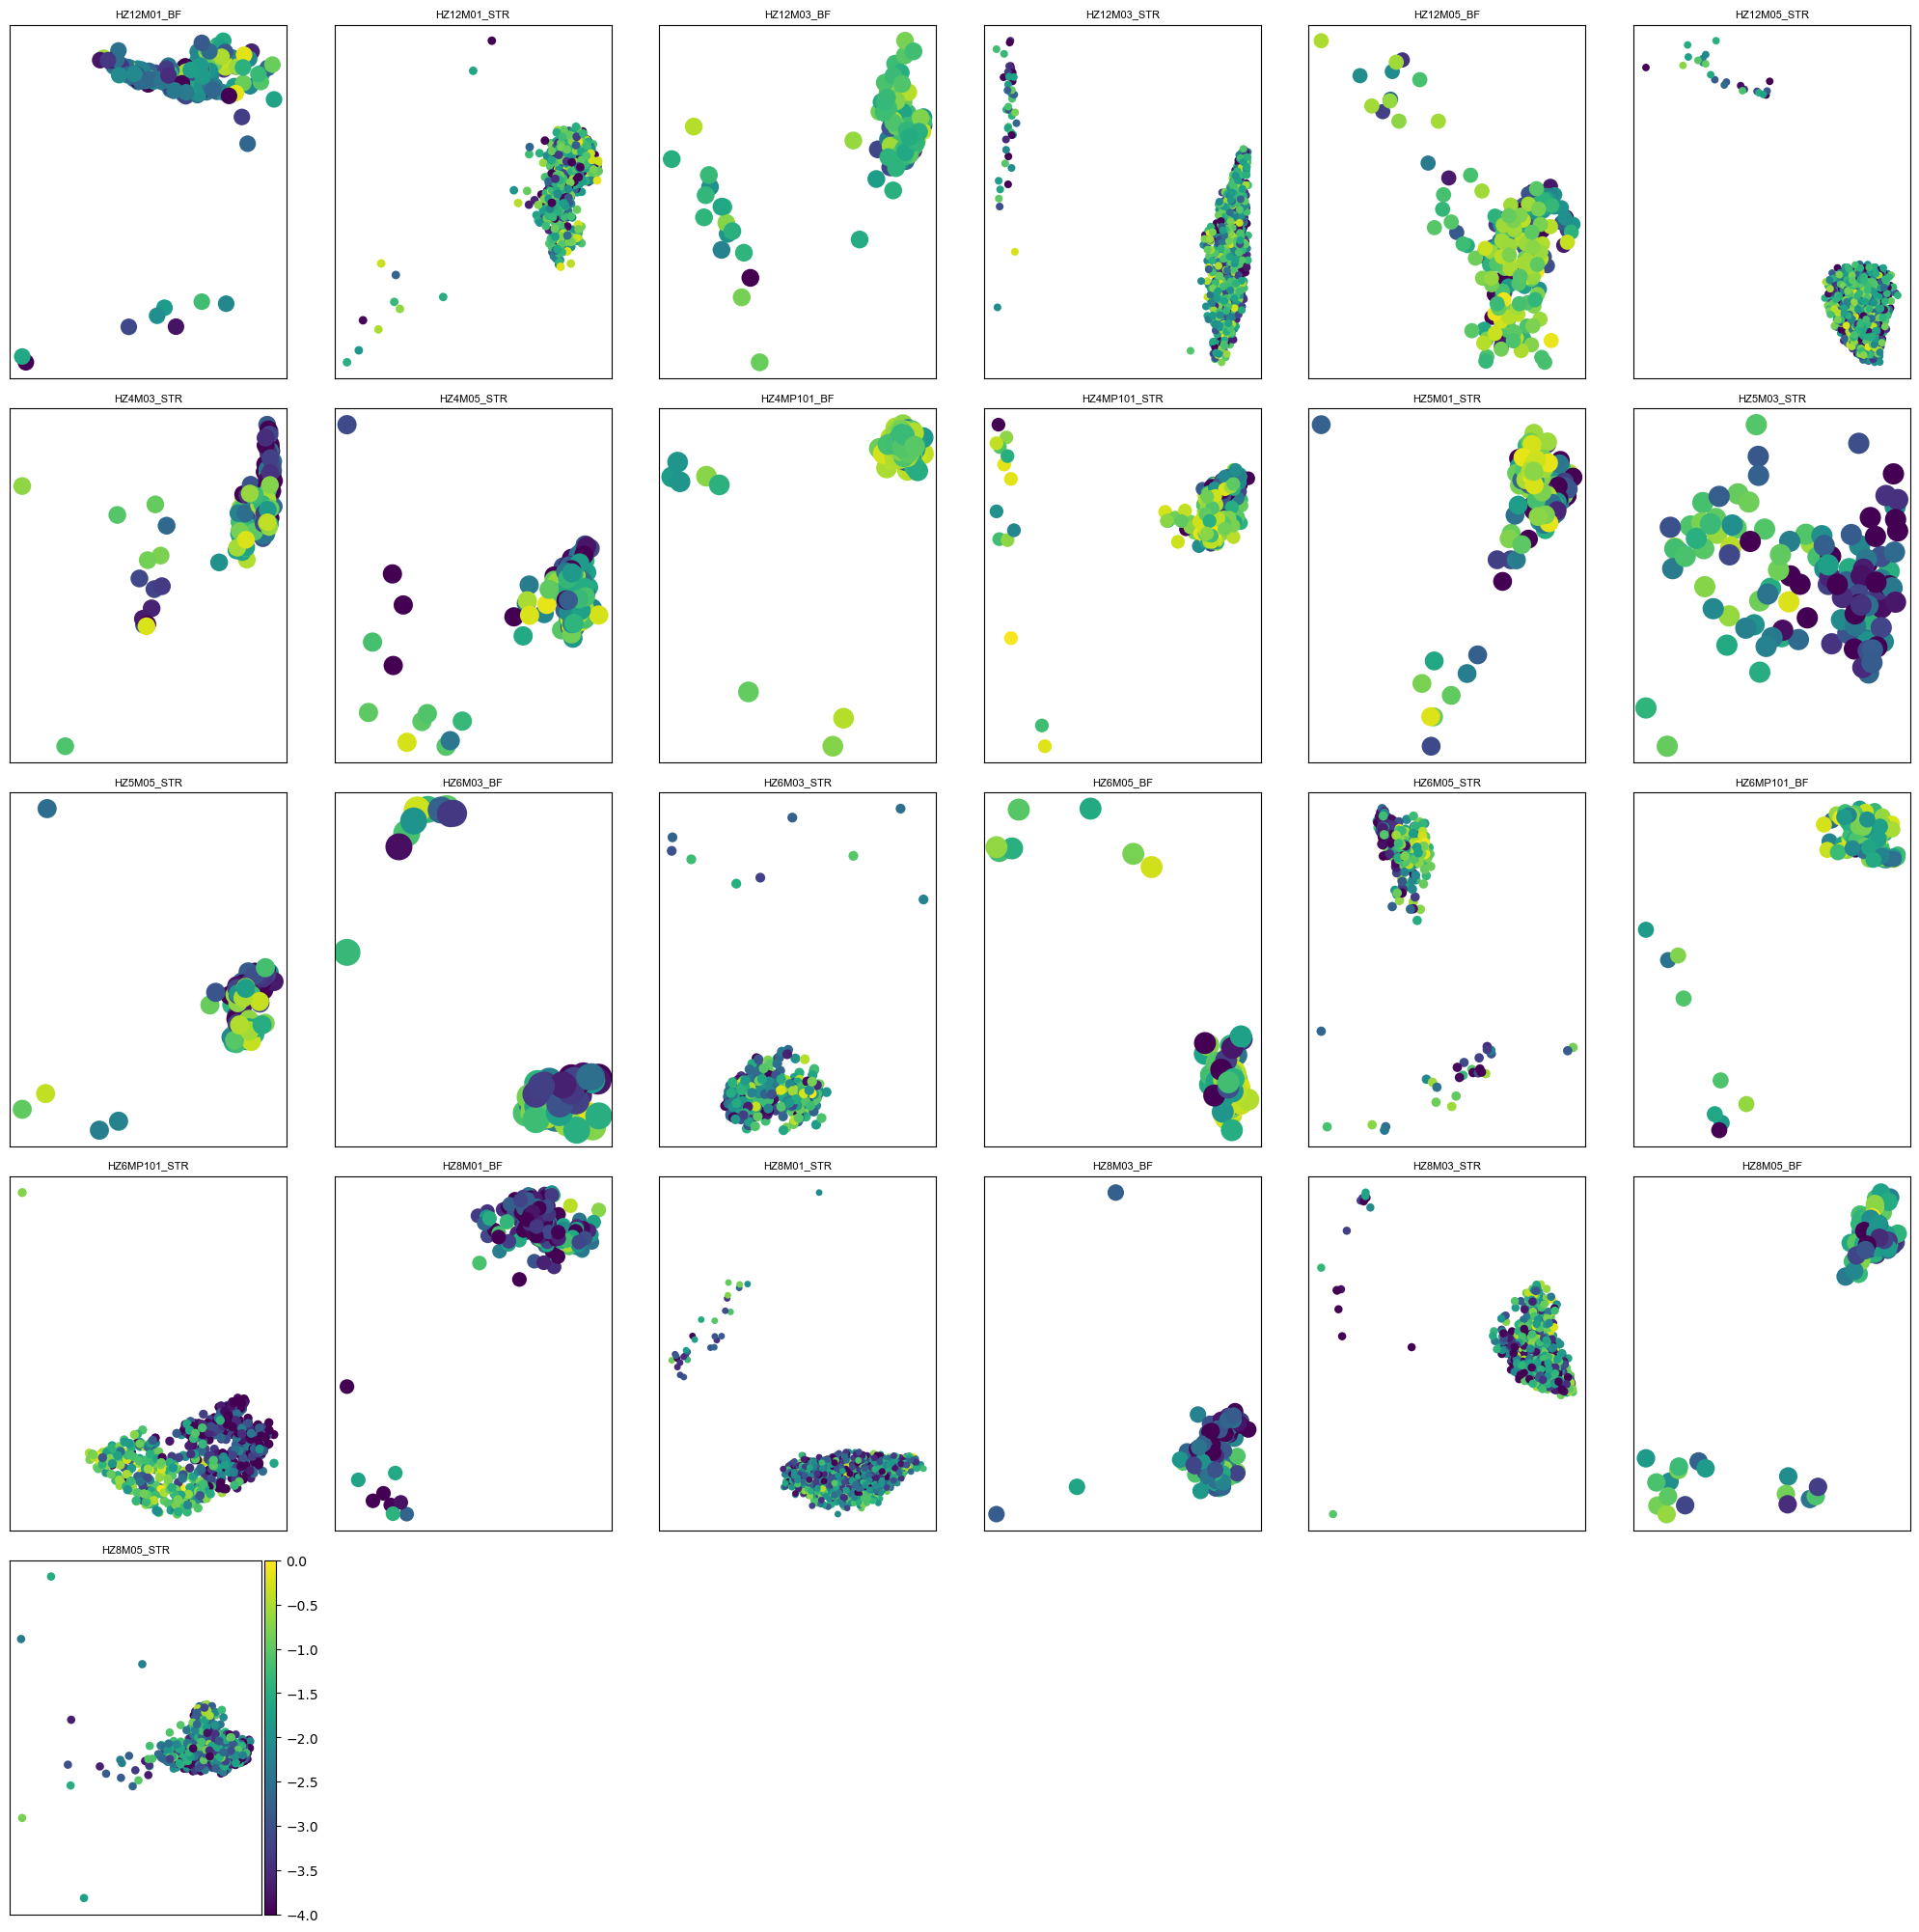

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Assuming subpal_data and other necessary imports are already defined

# Filter keys
valid_keys = [key for key in subpal_data if '01' in key or '03' in key or '05' in key]

# Calculate grid dimensions
n_plots = len(valid_keys)
n_cols = 6
n_rows = (n_plots + n_cols - 1) // n_cols  # Round up to account for partial rows

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))  # Adjust figure size if necessary
axes = axes.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Loop through valid keys and plot
plot_idx = 0
for key in valid_keys:
    adata = subpal_data[key]
    
    # Check condition for 'Micro-2' and 'near_Micro'
    mask = (adata.obs['fine'] == 'Micro-2') & (adata.obs['nearby_label'] == "near_Micro")
    
    if np.sum(mask) > 50:
        # Normalize min_center_dist and compute log_minmax_dist
        max_dist = adata.obs['min_center_dist'].max()
        min_dist = adata.obs['min_center_dist'].min()
        adata.obs['minmax_dist'] = adata.obs['min_center_dist'].apply(lambda x: (x - min_dist) / (max_dist - min_dist))
        adata.obs['log_minmax_dist'] = np.log(adata.obs['minmax_dist'] + 1e-9)
        
        # Plotting
        sc.pl.embedding(adata[mask], basis='X_harmony_umap', color='log_minmax_dist', ax=axes[plot_idx], 
                        vmin=-4, vmax=0, sort_order=False, show=False, colorbar_loc=None if 'HZ8M05' not in key or 'BF' in key else 'right')
        
        # Set title with custom font
        title = "_".join([key.split('_')[0], key.split('_')[2]])
        axes[plot_idx].set_title(title, font=font, fontsize=8)
        
        # Hide x and y labels
        axes[plot_idx].set_xlabel('')
        axes[plot_idx].set_ylabel('')
        
        # Remove outlines
        # axes[plot_idx].spines['top'].set_visible(False)
        # axes[plot_idx].spines['right'].set_visible(False)
        # axes[plot_idx].spines['left'].set_visible(False)
        # axes[plot_idx].spines['bottom'].set_visible(False)
        
        plot_idx += 1

# Turn off any unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('/home1/jijh/st_project/cellbin_analysis/article_figure/sup_figure/other_subpal_umap_clean_outline.pdf', dpi=300)
plt.show()


2024-09-29 00:02:22,260 - INFO - maxp pruned
2024-09-29 00:02:22,290 - INFO - cmap pruned
2024-09-29 00:02:22,292 - INFO - kern dropped
2024-09-29 00:02:22,293 - INFO - post pruned
2024-09-29 00:02:22,294 - INFO - FFTM dropped
2024-09-29 00:02:22,299 - INFO - GPOS pruned
2024-09-29 00:02:22,307 - INFO - GSUB pruned
2024-09-29 00:02:22,330 - INFO - glyf pruned
2024-09-29 00:02:22,348 - INFO - Added gid0 to subset
2024-09-29 00:02:22,350 - INFO - Added first four glyphs to subset
2024-09-29 00:02:22,350 - INFO - Closing glyph list over 'GSUB': 12 glyphs before
2024-09-29 00:02:22,351 - INFO - Glyph names: ['.notdef', '.null', 'five', 'four', 'minus', 'nonmarkingreturn', 'one', 'period', 'space', 'three', 'two', 'zero']
2024-09-29 00:02:22,355 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 3228]
2024-09-29 00:02:22,362 - INFO - Closed glyph list over 'GSUB': 12 glyphs after
2024-09-29 00:02:22,377 - INFO - Glyph names: ['.notdef', '.null', 'five', 'four', 'minus', 'nonmark

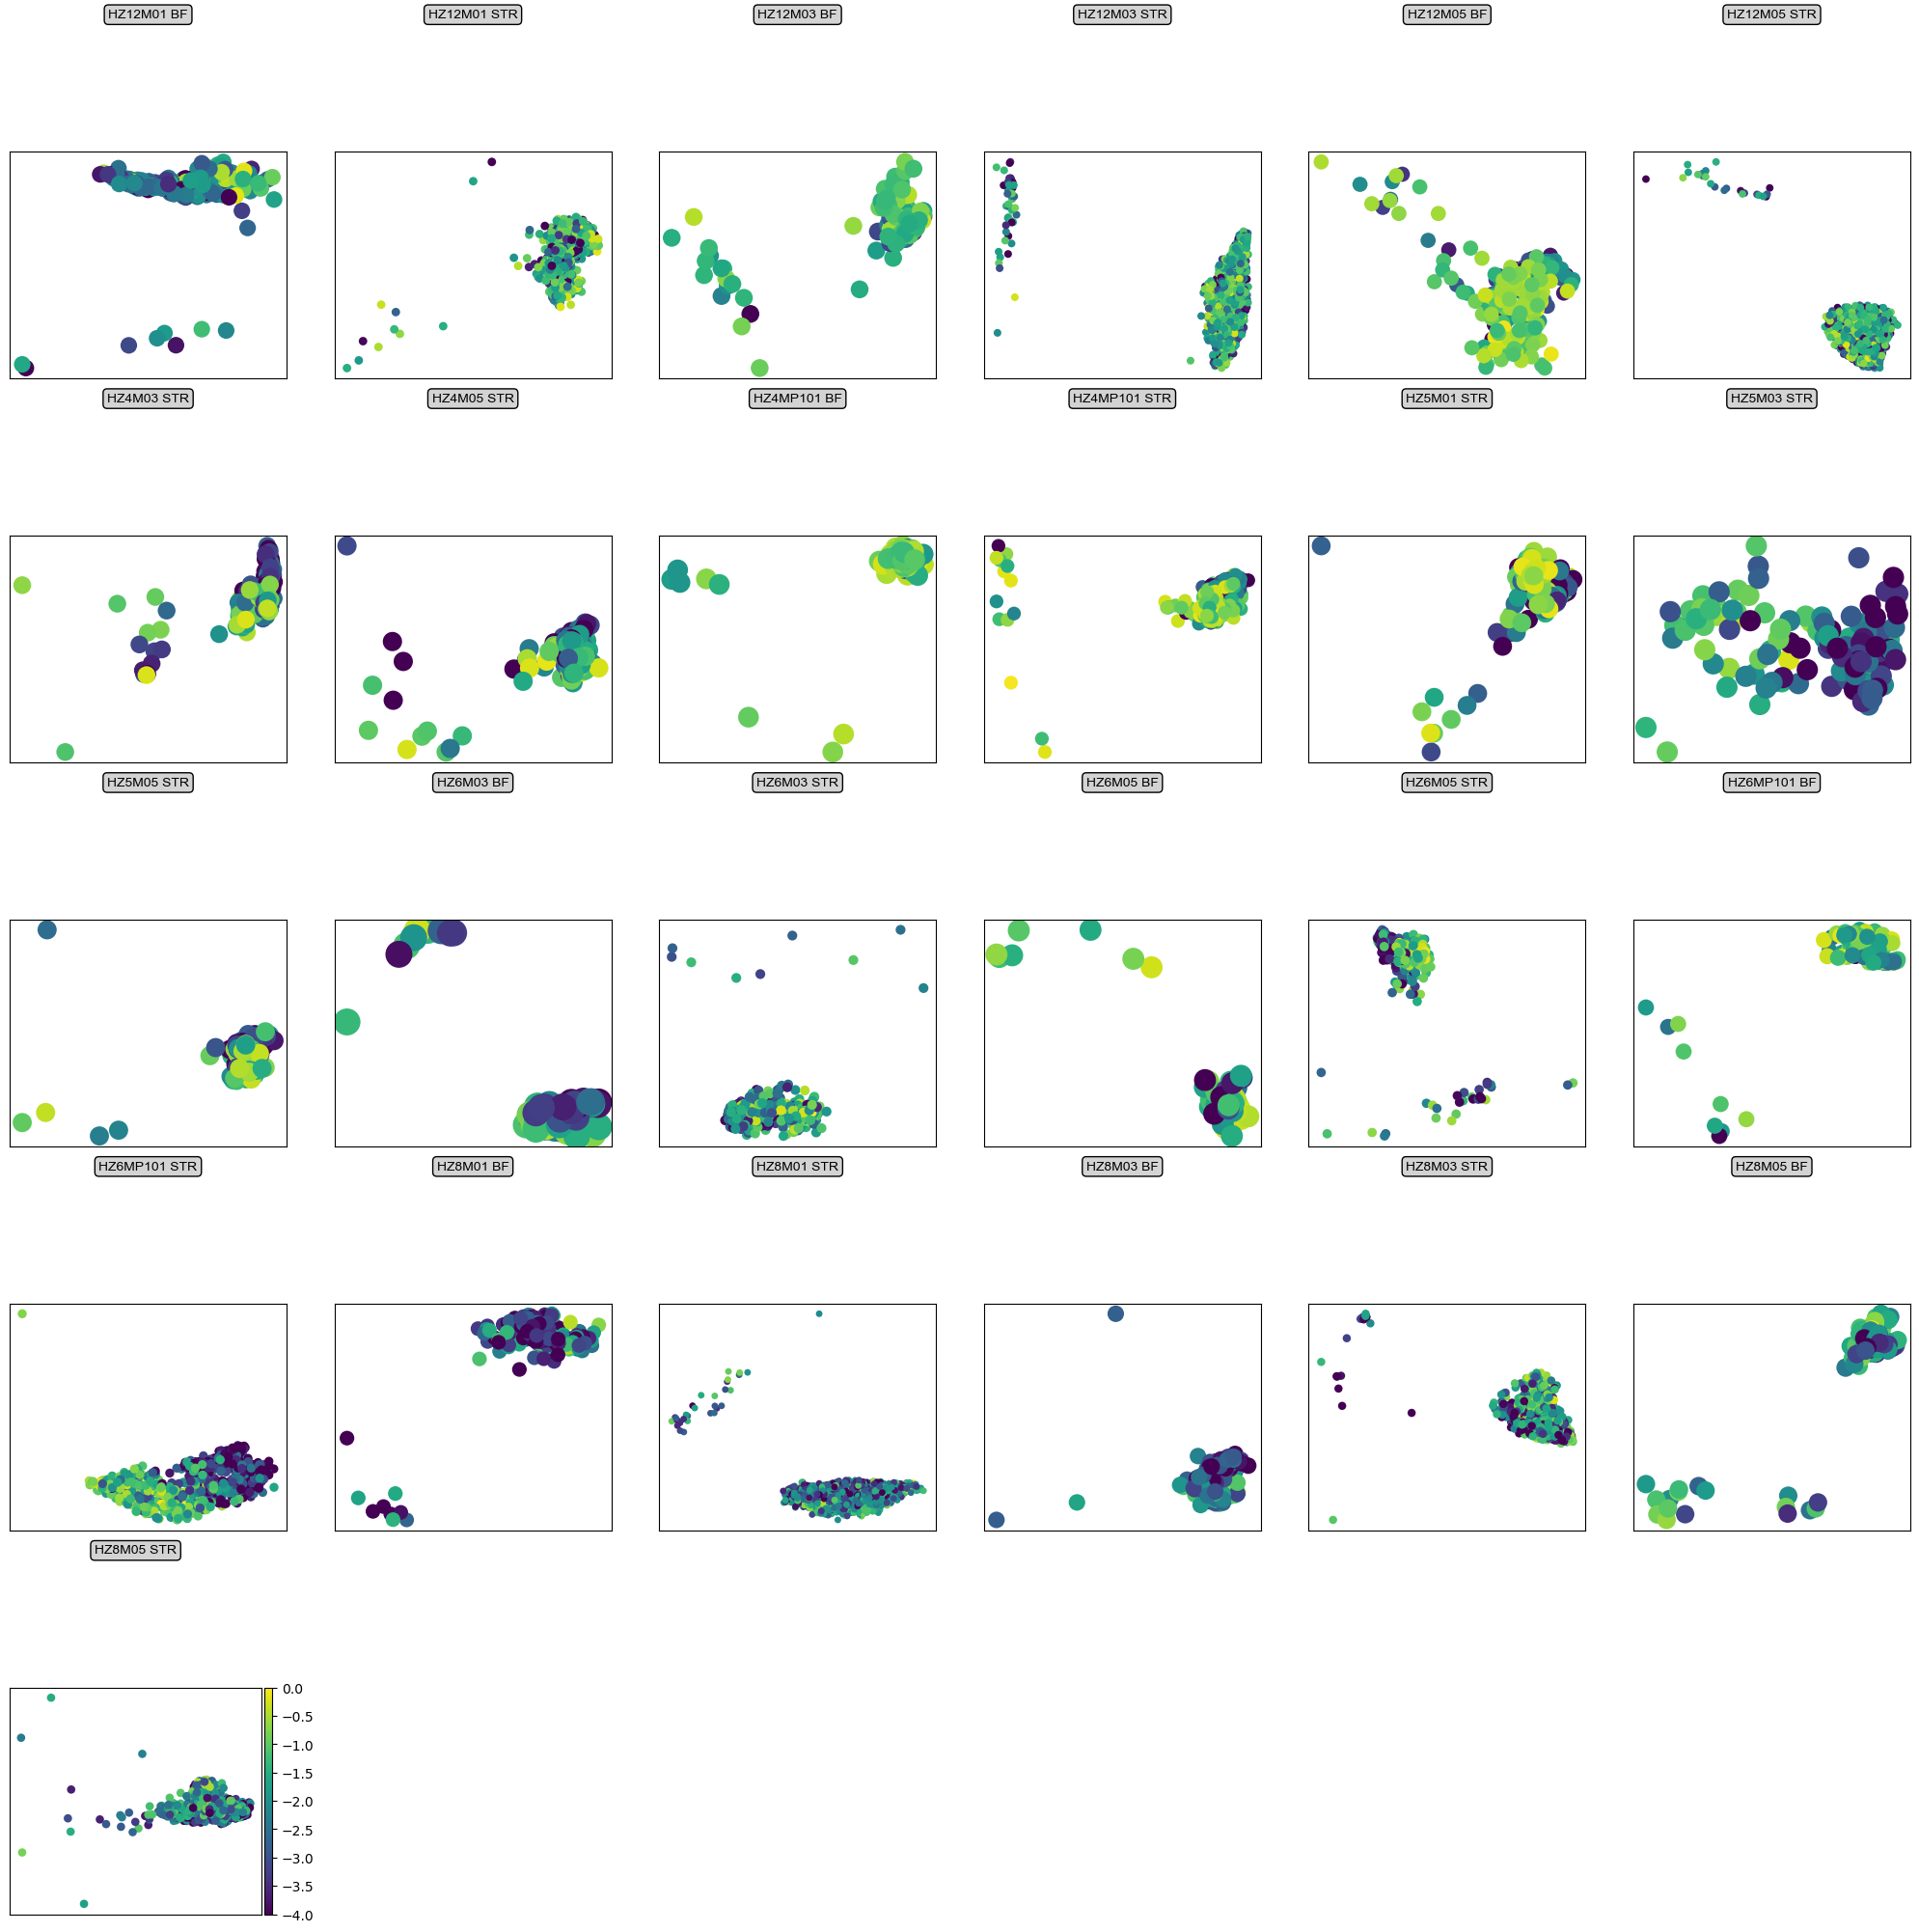

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Assuming subpal_data and other necessary imports are already defined

# Filter keys
valid_keys = [key for key in subpal_data if '01' in key or '03' in key or '05' in key]

# Calculate grid dimensions
n_plots = len(valid_keys)
n_cols = 6
n_rows = (n_plots + n_cols - 1) // n_cols  # Round up to account for partial rows

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))  # Adjust figure size if necessary
axes = axes.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Loop through valid keys and plot
plot_idx = 0
for key in valid_keys:
    adata = subpal_data[key]
    
    # Check condition for 'Micro-2' and 'near_Micro'
    mask = (adata.obs['fine'] == 'Micro-2') & (adata.obs['nearby_label'] == "near_Micro")
    
    if np.sum(mask) > 50:
        # Normalize min_center_dist and compute log_minmax_dist
        max_dist = adata.obs['min_center_dist'].max()
        min_dist = adata.obs['min_center_dist'].min()
        adata.obs['minmax_dist'] = adata.obs['min_center_dist'].apply(lambda x: (x - min_dist) / (max_dist - min_dist))
        adata.obs['log_minmax_dist'] = np.log(adata.obs['minmax_dist'] + 1e-9)
        
        # Plotting
        sc.pl.embedding(adata[mask], basis='X_harmony_umap', color='log_minmax_dist', ax=axes[plot_idx], 
                        vmin=-4, vmax=0, sort_order=False, show=False, colorbar_loc=None if 'HZ8M05' not in key or 'BF' in key else 'right')
        
        # Set title with custom font and bounding box width equal to axis width
        title = " ".join([key.split('_')[0], key.split('_')[2]])
        
        # Get the axis position and width
        bbox_pos = axes[plot_idx].get_position()
        bbox_width = bbox_pos.width * fig.get_size_inches()[0]  # Adjust to figure size
        
        # Set the title with a custom bbox width matching the axis width
        axes[plot_idx].set_title(title, font = font,
                                 bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.3'),
                                 horizontalalignment='center', pad=10)
        
        # Hide x and y labels
        axes[plot_idx].set_xlabel('')
        axes[plot_idx].set_ylabel('')
        
        plot_idx += 1

# Turn off any unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('/home1/jijh/st_project/cellbin_analysis/article_figure/sup_figure/other_subpal_umap_title.pdf', dpi=300)
plt.show()


In [45]:
pal_data = {}

for key, path in files.items():
    if 'BF' not in key and 'STR' not in key:
        print(key)
        pal_data[key] = sc.read_h5ad(path)



HZ12M01_coorect_PFC_regress_harmony_cellbin
HZ12M02_coorect_ECT_regress_harmony_cellbin
HZ12M02_coorect_HPF_regress_harmony_cellbin
HZ12M02_coorect_RS_regress_harmony_cellbin
HZ12M02_coorect_TH_regress_harmony_cellbin
HZ12M03_coorect_PFC_regress_harmony_cellbin
HZ12M04_coorect_ECT_regress_harmony_cellbin
HZ12M04_coorect_HPF_regress_harmony_cellbin
HZ12M04_coorect_RS_regress_harmony_cellbin
HZ12M04_coorect_TH_regress_harmony_cellbin
HZ12M05_coorect_PFC_regress_harmony_cellbin
HZ12M06_coorect_ECT_regress_harmony_cellbin
HZ12M06_coorect_HPF_regress_harmony_cellbin
HZ12M06_coorect_RS_regress_harmony_cellbin
HZ12M06_coorect_TH_regress_harmony_cellbin
HZ2M01_coorect_PFC_regress_harmony_cellbin
HZ2M02_coorect_ECT_regress_harmony_cellbin
HZ2M02_coorect_HPF_regress_harmony_cellbin
HZ2M02_coorect_RS_regress_harmony_cellbin
HZ2M02_coorect_TH_regress_harmony_cellbin
HZ2M03_coorect_PFC_regress_harmony_cellbin
HZ2M04_coorect_ECT_regress_harmony_cellbin
HZ2M04_coorect_HPF_regress_harmony_cellbin
HZ2M

2024-09-29 00:39:50,800 - INFO - maxp pruned
2024-09-29 00:39:50,826 - INFO - cmap pruned
2024-09-29 00:39:50,828 - INFO - kern dropped
2024-09-29 00:39:50,829 - INFO - post pruned
2024-09-29 00:39:50,830 - INFO - FFTM dropped
2024-09-29 00:39:50,835 - INFO - GPOS pruned
2024-09-29 00:39:50,842 - INFO - GSUB pruned
2024-09-29 00:39:50,861 - INFO - glyf pruned
2024-09-29 00:39:50,865 - INFO - Added gid0 to subset
2024-09-29 00:39:50,867 - INFO - Added first four glyphs to subset
2024-09-29 00:39:50,868 - INFO - Closing glyph list over 'GSUB': 12 glyphs before
2024-09-29 00:39:50,868 - INFO - Glyph names: ['.notdef', '.null', 'five', 'four', 'minus', 'nonmarkingreturn', 'one', 'period', 'space', 'three', 'two', 'zero']
2024-09-29 00:39:50,872 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 3228]
2024-09-29 00:39:50,876 - INFO - Closed glyph list over 'GSUB': 12 glyphs after
2024-09-29 00:39:50,877 - INFO - Glyph names: ['.notdef', '.null', 'five', 'four', 'minus', 'nonmark

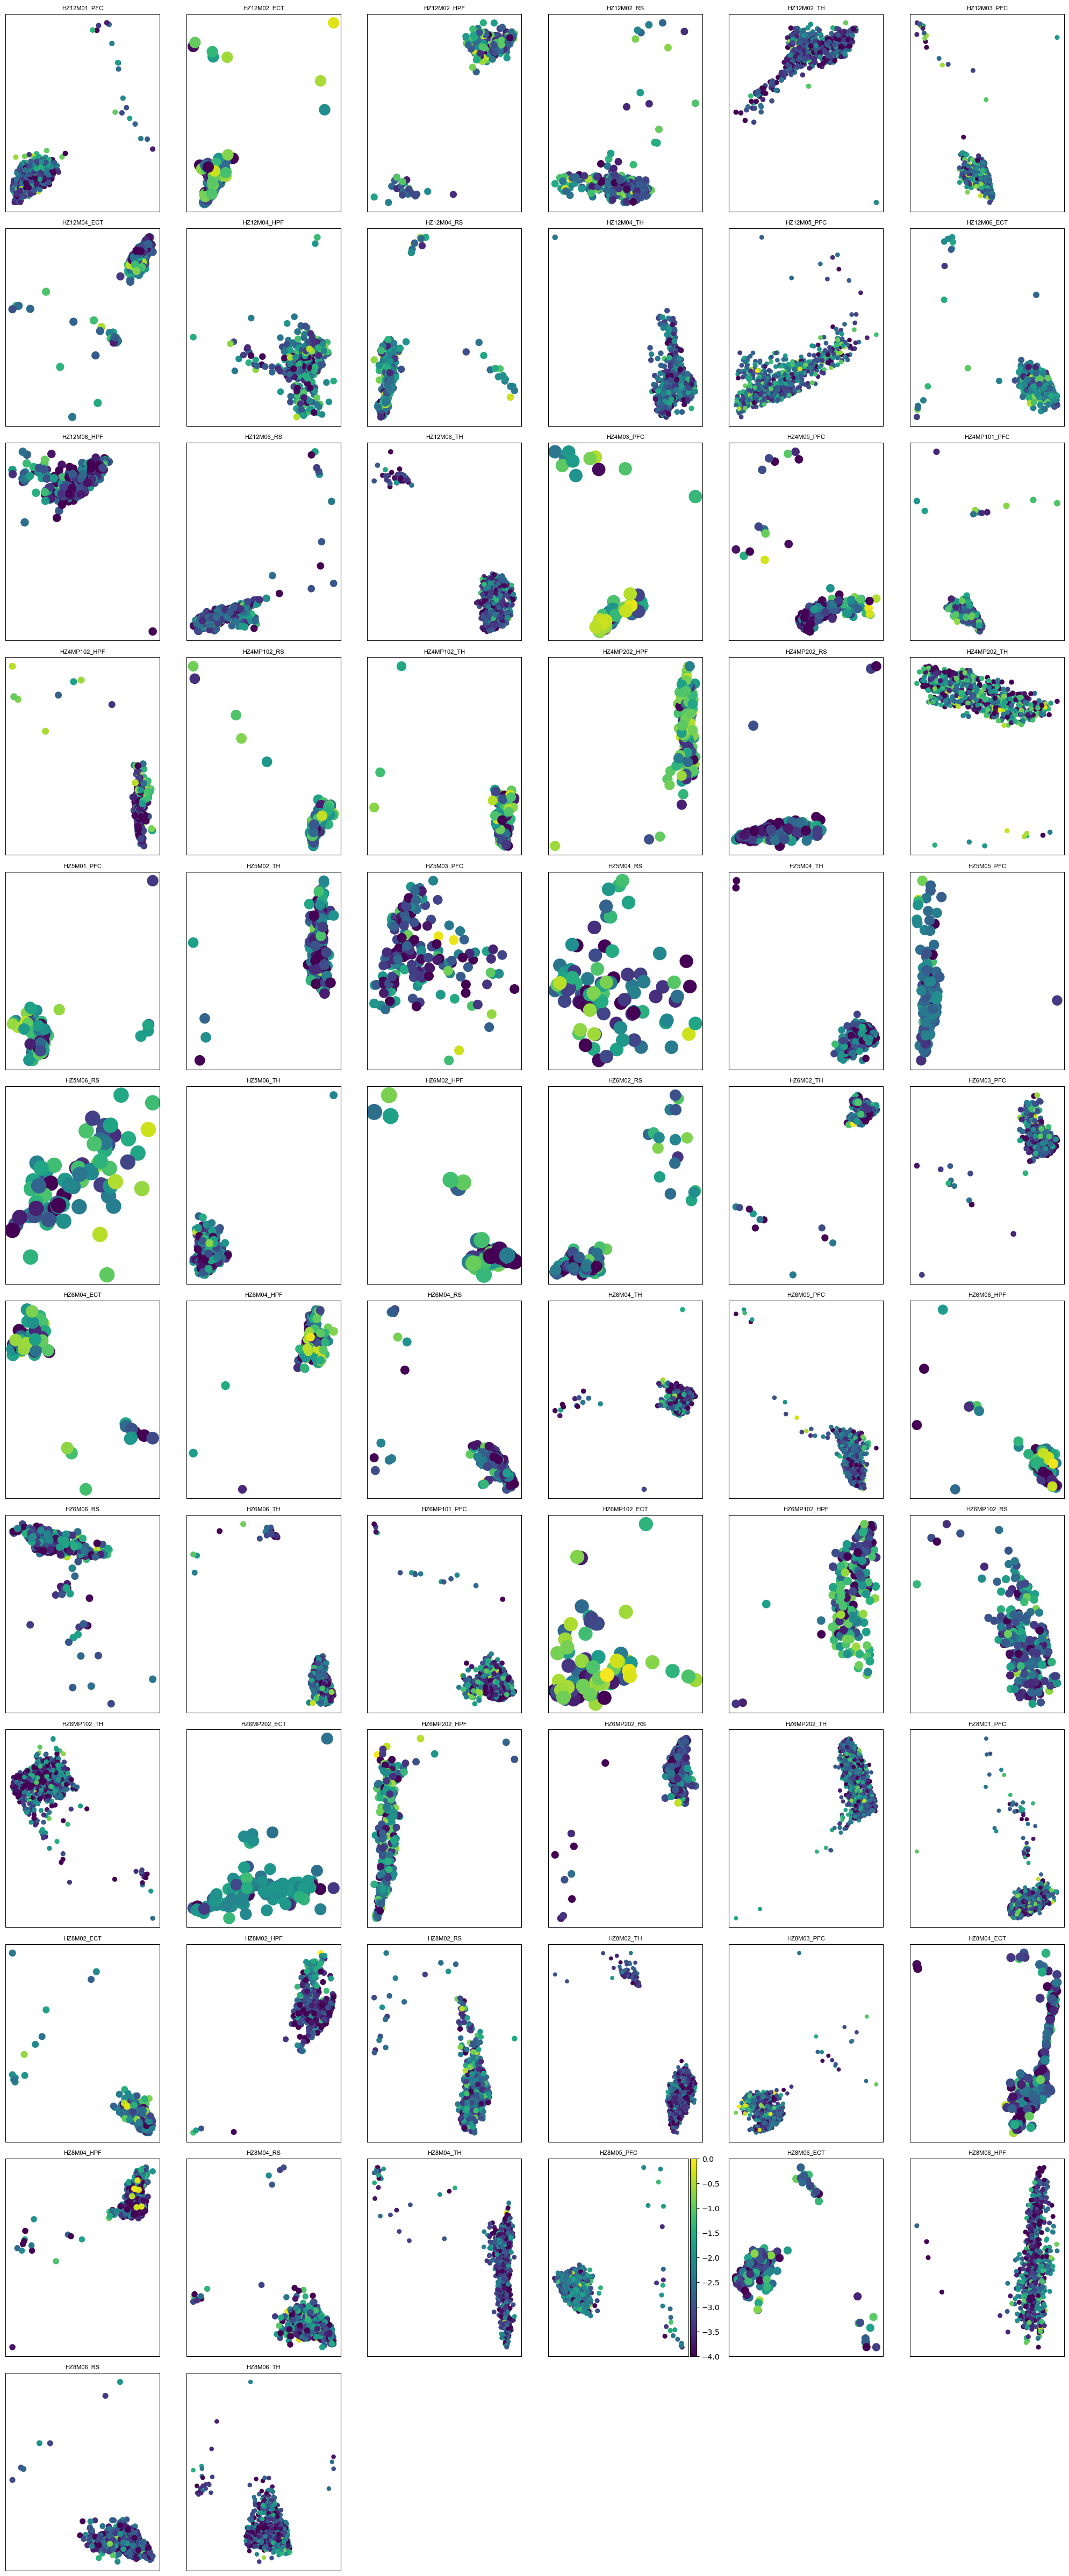

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Assuming subpal_data and other necessary imports are already defined

# Filter keys
valid_keys = [key for key in pal_data]

# Calculate grid dimensions
n_plots = len(valid_keys)
n_cols = 6
n_rows = (n_plots + n_cols - 1) // n_cols  # Round up to account for partial rows

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))  # Adjust figure size if necessary
axes = axes.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Loop through valid keys and plot
plot_idx = 0
for key in valid_keys:
    adata = pal_data[key]
    
    # Check condition for 'Micro-2' and 'near_Micro'
    mask = (adata.obs['fine'] == 'Micro-2') & (adata.obs['nearby_label'] == "near_Micro")
    
    if np.sum(mask) > 50:
        # Normalize min_center_dist and compute log_minmax_dist
        max_dist = adata.obs['min_center_dist'].max()
        min_dist = adata.obs['min_center_dist'].min()
        adata.obs['minmax_dist'] = adata.obs['min_center_dist'].apply(lambda x: (x - min_dist) / (max_dist - min_dist))
        adata.obs['log_minmax_dist'] = np.log(adata.obs['minmax_dist'] + 1e-9)
        
        # Plotting
        sc.pl.embedding(adata[mask], basis='X_harmony_umap', color='log_minmax_dist', ax=axes[plot_idx], 
                        vmin=-4, vmax=0, sort_order=False, show=False, colorbar_loc=None if 'HZ8M05' not in key or 'BF' in key else 'right')
        
        # Set title with custom font
        title = "_".join([key.split('_')[0], key.split('_')[2]])
        axes[plot_idx].set_title(title, font=font, fontsize=8)
        
        # Hide x and y labels
        axes[plot_idx].set_xlabel('')
        axes[plot_idx].set_ylabel('')
        
        # # Remove outlines
        # axes[plot_idx].spines['top'].set_visible(False)
        # axes[plot_idx].spines['right'].set_visible(False)
        # axes[plot_idx].spines['left'].set_visible(False)
        # axes[plot_idx].spines['bottom'].set_visible(False)
        
        plot_idx += 1

# Turn off any unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('/home1/jijh/st_project/cellbin_analysis/article_figure/sup_figure/other_pal_umap_clean_outline.pdf', dpi=300)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Assuming subpal_data and other necessary imports are already defined

# Filter keys
valid_keys = [key for key in subpal_data if '01' in key or '03' in key or '05' in key]

# Calculate grid dimensions
n_plots = len(valid_keys)
n_cols = 6
n_rows = (n_plots + n_cols - 1) // n_cols  # Round up to account for partial rows

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))  # Adjust figure size if necessary
axes = axes.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Loop through valid keys and plot
for i, key in enumerate(valid_keys):
    adata = subpal_data[key]
    
    # Check condition for 'Micro-2' and 'near_Micro'
    mask = (adata.obs['fine'] == 'Micro-2') & (adata.obs['nearby_label'] == "near_Micro")
    
    if np.sum(mask) > 50:
        # Normalize min_center_dist and compute log_minmax_dist
        max_dist = adata.obs['min_center_dist'].max()
        min_dist = adata.obs['min_center_dist'].min()
        adata.obs['minmax_dist'] = adata.obs['min_center_dist'].apply(lambda x: (x - min_dist) / (max_dist - min_dist))
        adata.obs['log_minmax_dist'] = np.log(adata.obs['minmax_dist'] + 1e-9)
        
        # Plotting
        sc.pl.embedding(adata[mask], basis='X_harmony_umap', color='log_minmax_dist', title="_".join([key.split('_')[0], key.split('_')[2]]),
                        ax=axes[i], vmin=-4, vmax=0, sort_order=False, show=False)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


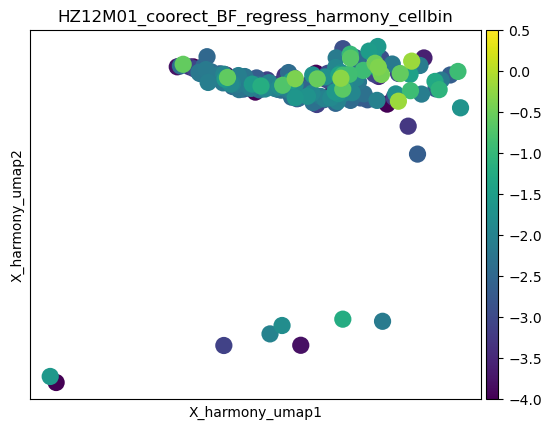

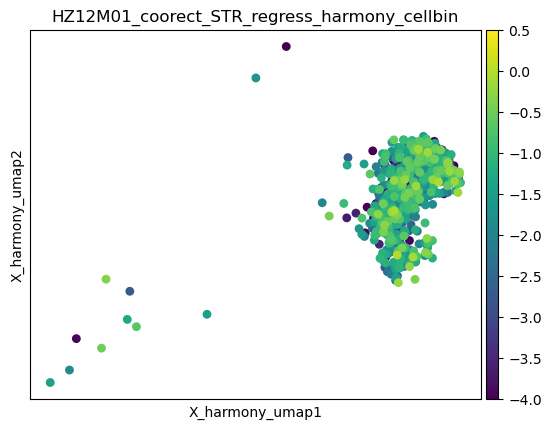

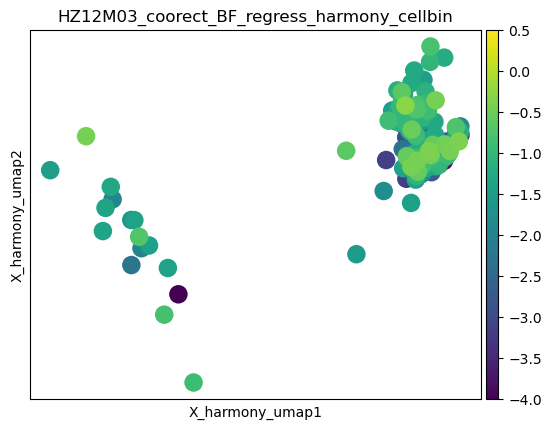

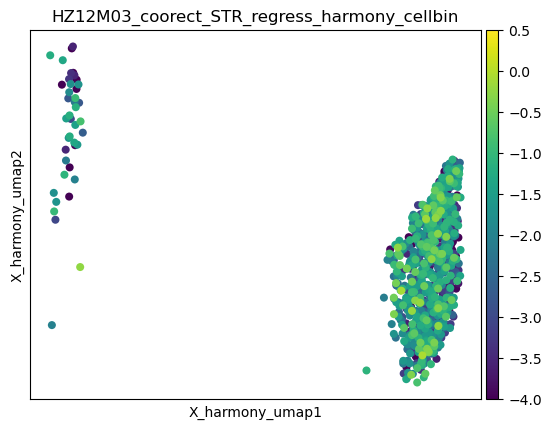

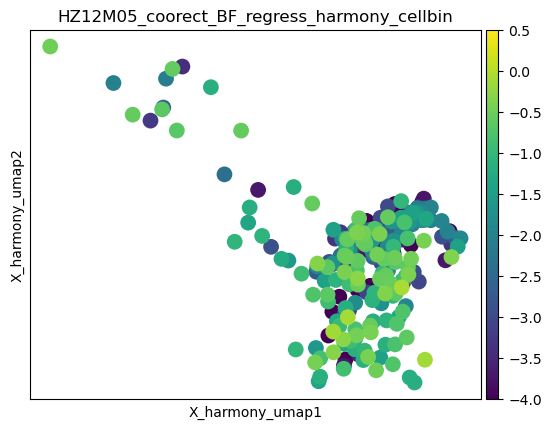

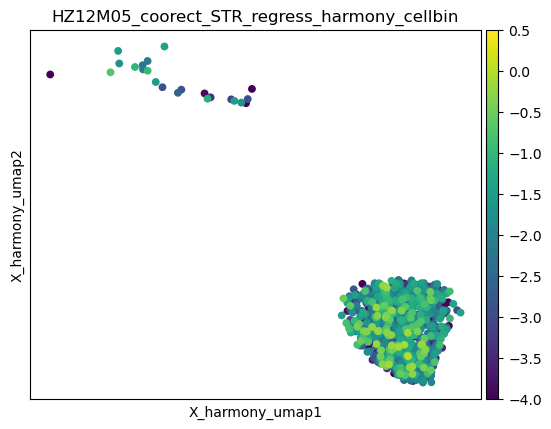

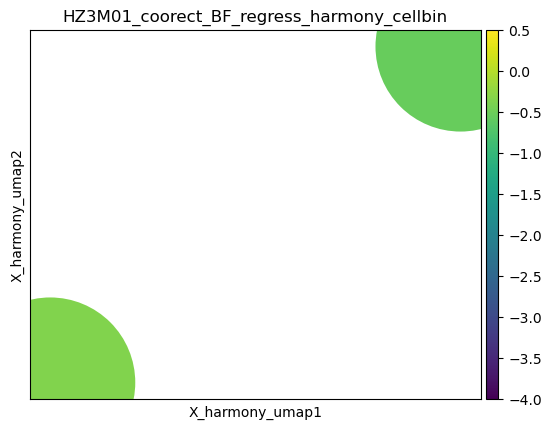

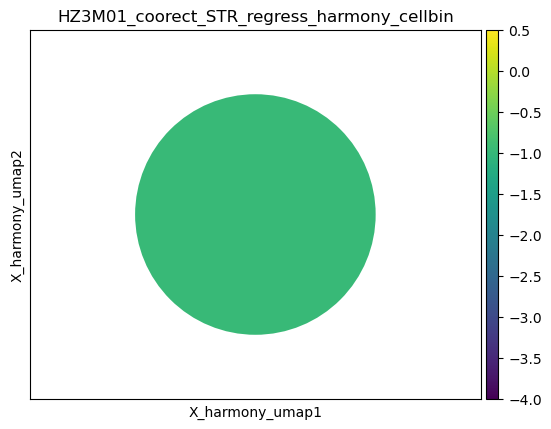

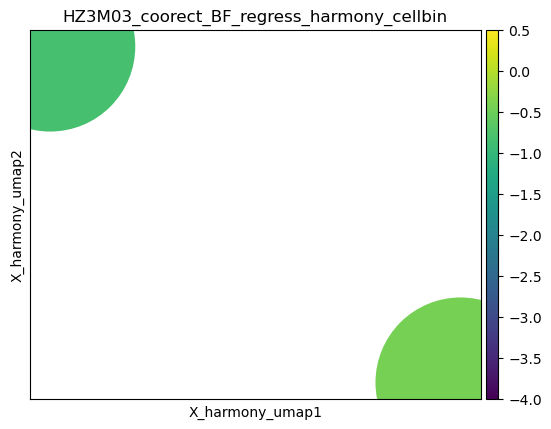

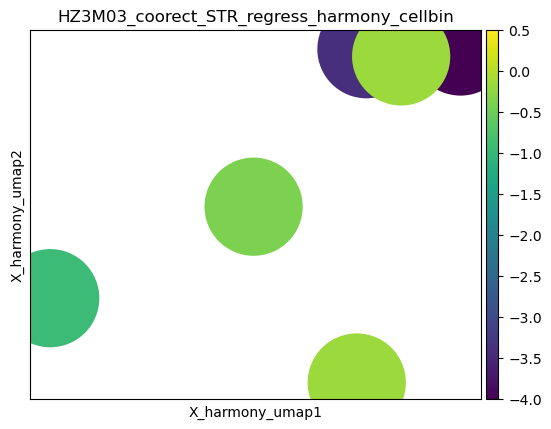

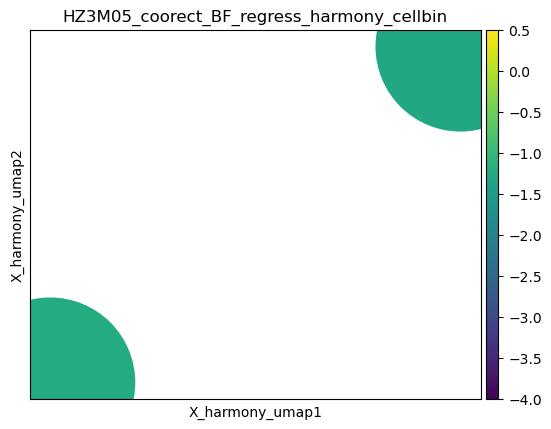

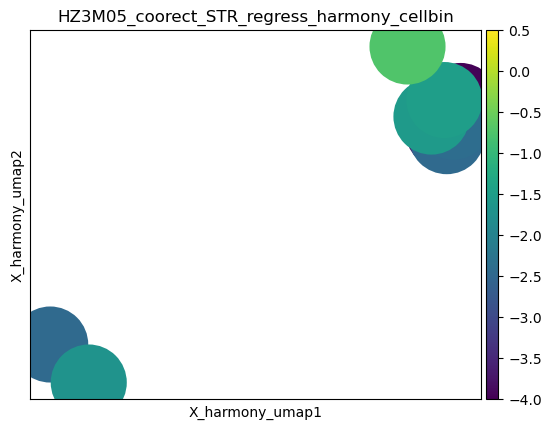

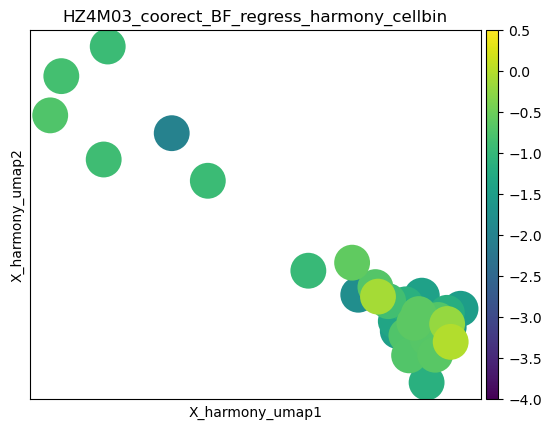

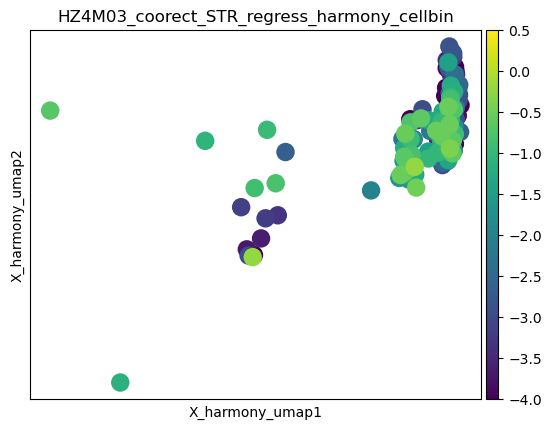

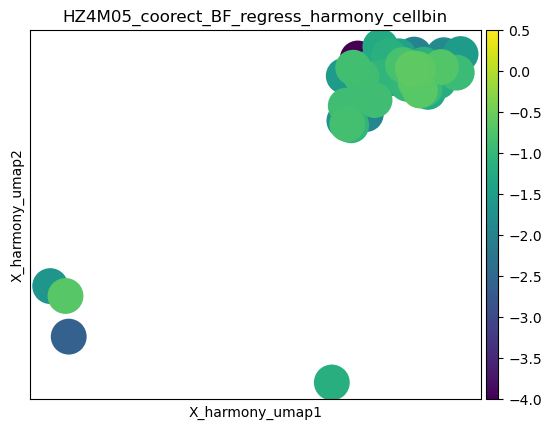

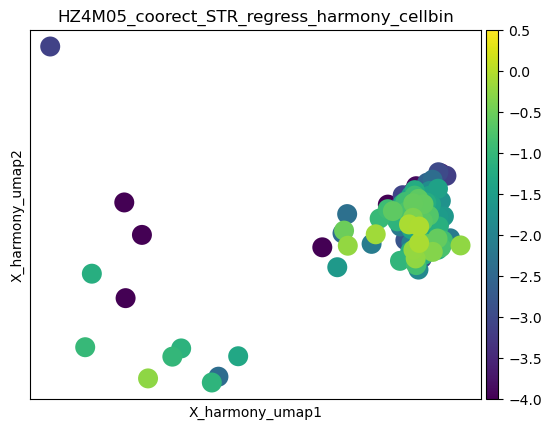

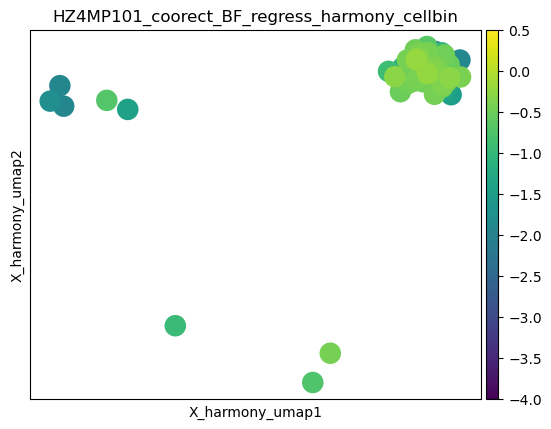

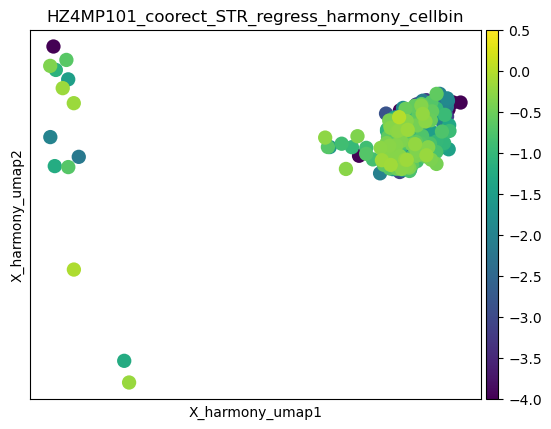

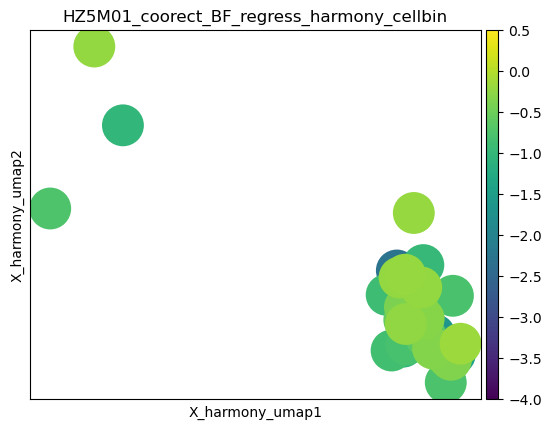

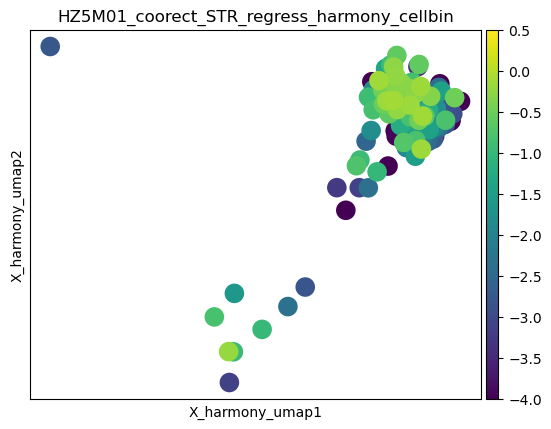

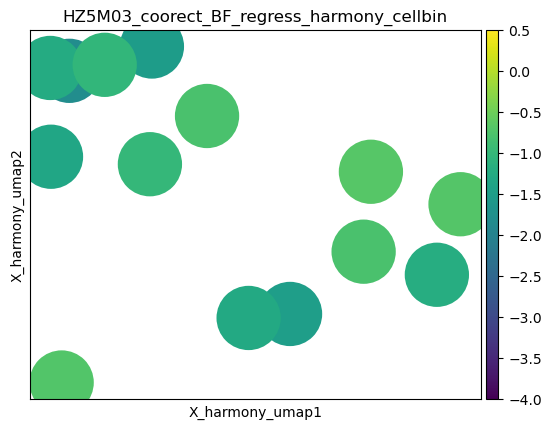

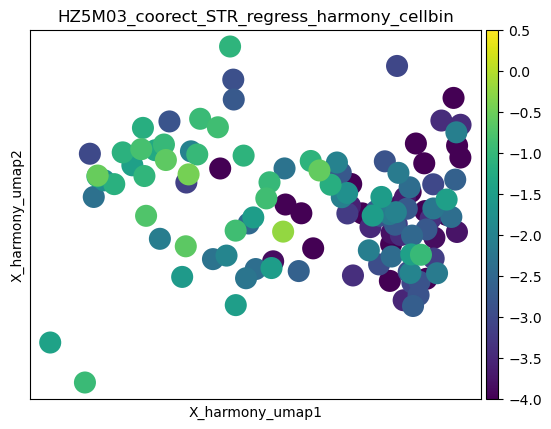

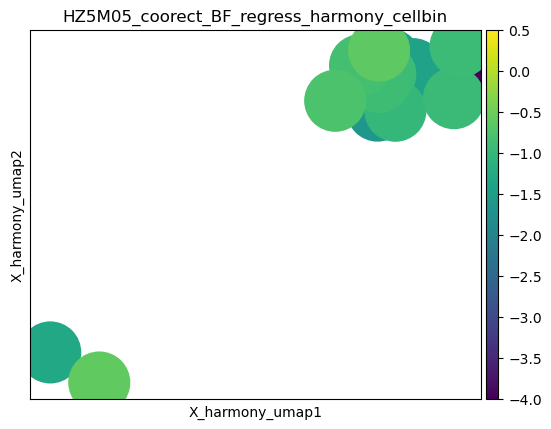

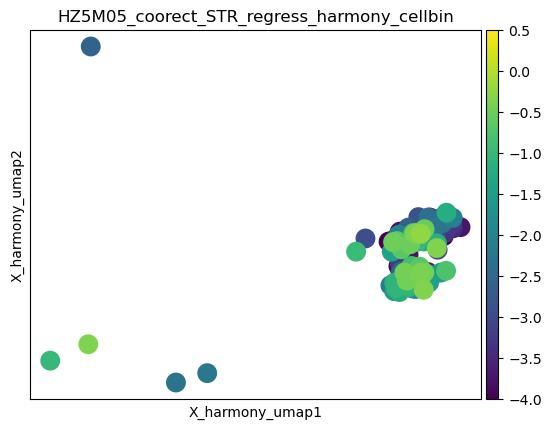

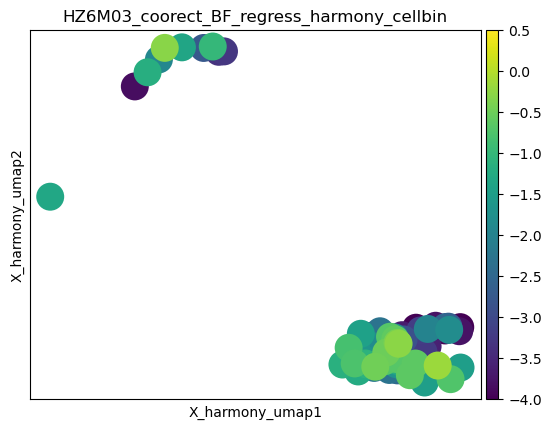

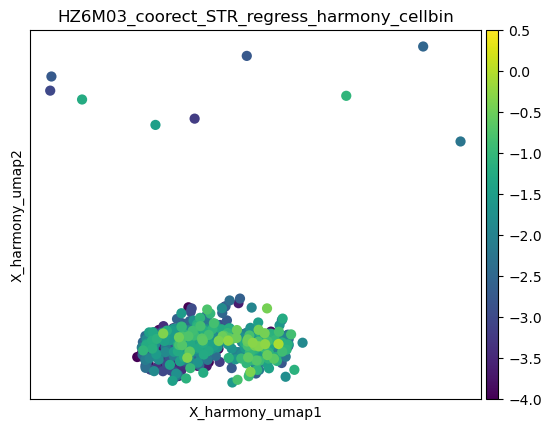

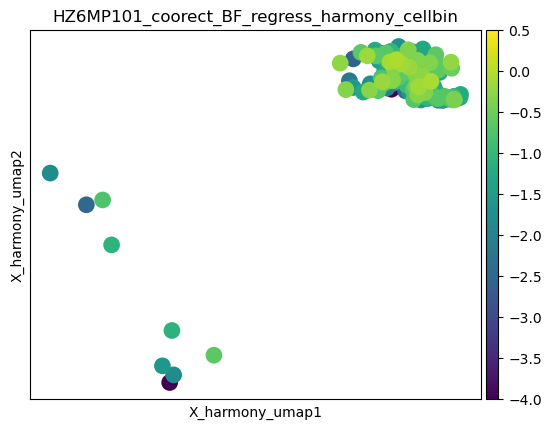

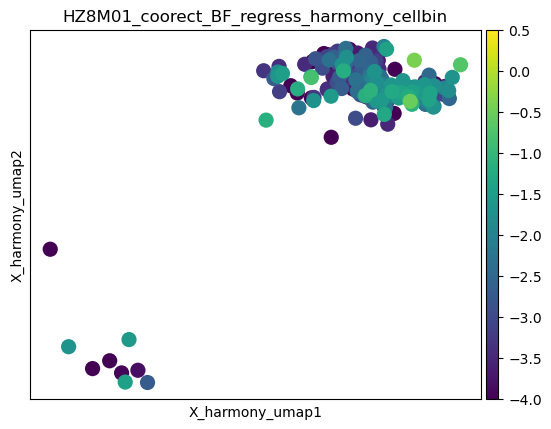

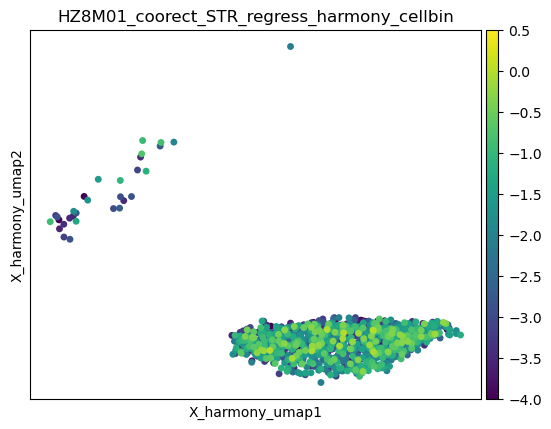

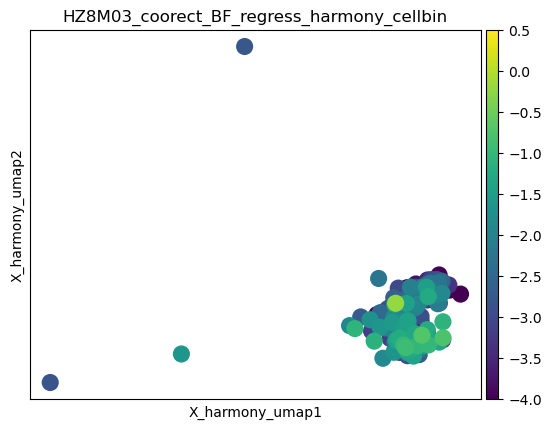

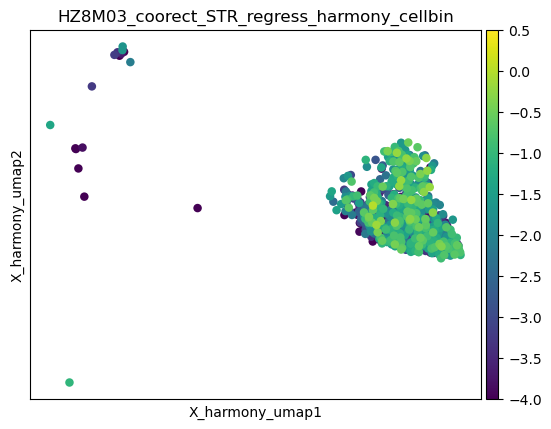

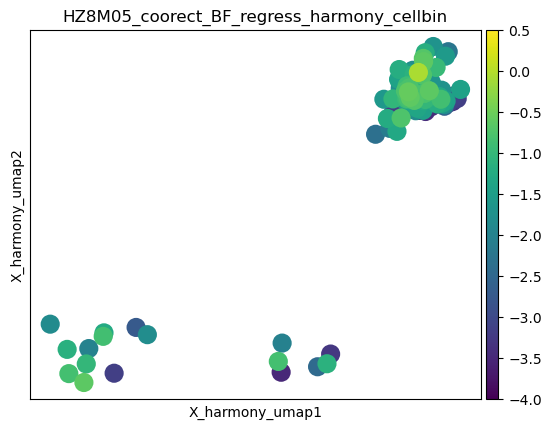

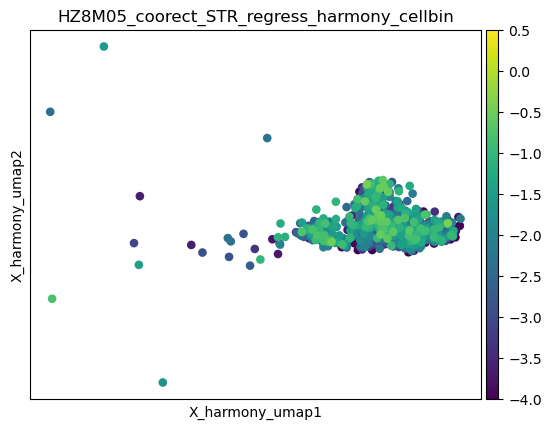

In [34]:
for key, adata in subpal_data.items():
    if '01' in key or '03' in key or '05' in key:
        mask = adata.obs['fine'] == 'Micro-2'
        mask &= adata.obs['nearby_label']=="near_Micro"
        if np.sum(mask > 0):
            max_dist = adata.obs['min_center_dist'].max()
            min_dist = adata.obs['min_center_dist'].min()
            adata.obs['minmax_dist'] = adata.obs['min_center_dist'].apply(lambda x: (x - min_dist) / (max_dist - min_dist))
            adata.obs['log_minmax_dist'] = np.log(adata.obs['minmax_dist'] + 1e-9)
            fig, ax = plt.subplots()
            sc.pl.embedding(adata[mask], basis='X_harmony_umap', color='log_minmax_dist', title=key, ax=ax, 
                            vmin=-4, vmax=0.5, sort_order=True)
            ax.set_aspect('equal', 'box')
            plt.show()

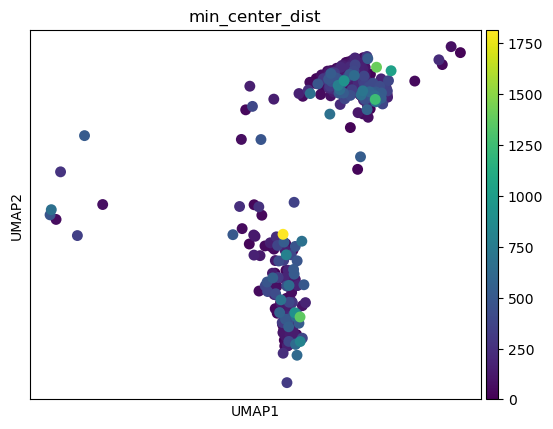

In [14]:
mask = adata.obs['fine'] == 'Micro-2'
sc.pl.umap(adata[mask], color='min_center_dist')

# SN DATA

In [10]:
str_files = {}
for key, file in files.items():
    if 'STR' in key:
        str_files[key] = file

In [11]:
str_adatas = cm.io.load_data_in_parallel(str_files, sc.read_h5ad)


In [16]:
str_adatas

{'HZ12M01_coorect_STR_regress_harmony_cellbin': AnnData object with n_obs × n_vars = 35833 × 4756
     obs: 'Unnamed: 0.1', 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'datatype', 'region_abb', 'nCount_RNA', 'nFea

# ChN Moran's I

In [44]:
adata = str_adatas['HZ12M01_coorect_STR_regress_harmony_cellbin'].copy()

In [15]:
adata

NameError: name 'adata' is not defined

# ChN Coordinates

In [48]:
os.listdir('/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/')

['corrected_sct_cellbin_h5ad',
 'wt_cellbin_h5seurat',
 'meta_operation.ipynb',
 'small_6M.ipynb',
 'wrong_cellbin_data',
 'Download.ipynb',
 'Upload_meta.ipynb',
 'region_meta',
 'test_script.ipynb',
 'scale_moranI.ipynb',
 'test_for_cellbin.ipynb',
 'sn_data_test.ipynb',
 'wt_sct_cellbin',
 'cellbin_transfer_plaque',
 'true_sn_ref.h5ad',
 'Download-SN.ipynb',
 'small_5M.ipynb',
 'small_sn.ipynb',
 'corrected_sct_cellbin',
 'moranI_result',
 'regress_harmony',
 'sct_for_wtcellbin.ipynb',
 'sn_sct_h5ad',
 'output_h5ad',
 'wt_cellbin_transfer_plaque',
 'moran_result_summary.ipynb',
 'log_nor_cellbin_data',
 'sct_for_cellbins.ipynb',
 'wt_sct_cellbin_h5ad',
 'focus_large_HZ6M02.pdf',
 'sn_data',
 'cellbin_meta',
 'wt_labled_meta',
 'Visualizasion_new.ipynb',
 '再做一次cellbin表达量.ipynb',
 'sup_adj_cellbin_data',
 'scanorama_integration.ipynb',
 'all_sn_ref.h5ad',
 'slice_regress',
 'all_cellbin_meta.csv',
 'sn_h5',
 'combined_moranI.ipynb',
 '.ipynb_checkpoints',
 'morontemp',
 "Moran's I.ipy

In [18]:
ori_files = cm.io.list_files_matching_criteria('/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data',
                                                "'h5ad' in file and 'log' not in file", separator='.')

In [19]:
ori_files

{'HZ12M01': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ12M01.h5ad',
 'HZ12M02': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ12M02.h5ad',
 'HZ12M03': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ12M03.h5ad',
 'HZ12M04': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ12M04.h5ad',
 'HZ12M05': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ12M05.h5ad',
 'HZ12M06': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ12M06.h5ad',
 'HZ2M01': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ2M01.h5ad',
 'HZ2M02': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_nor_cellbin_data/HZ2M02.h5ad',
 'HZ2M03': '/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/log_no

In [20]:
adatas = cm.io.load_data_in_parallel(ori_files, sc.read_h5ad)

: 

In [25]:
import pandas as pd

# BEGIN: Extract indices with "Chat" expression > 0
chat_indices = {}
for key, adata in adatas.items():
    print(key)
    if 'Chat' in adata.var_names:
        chat_expression = adata[:, 'Chat'].X.toarray()
        mask = chat_expression > 0
        mask = mask.flatten()
        chat_positive = adata.obs[mask].index
        chat_indices[key] = pd.DataFrame(chat_positive, columns=['Index'])
    else:
        chat_indices[key] = 'NA'
# END:

chat_indices

{'HZ12M01':       Index
 0       353
 1      1551
 2      1864
 3      3141
 4      3143
 ..      ...
 317  114517
 318  114541
 319  115476
 320  115654
 321  116290
 
 [322 rows x 1 columns],
 'HZ12M02':      Index
 0      317
 1     2006
 2     5813
 3     5935
 4    11942
 ..     ...
 63  168876
 64  169630
 65  169638
 66  174813
 67  178884
 
 [68 rows x 1 columns],
 'HZ12M03':       Index
 0       262
 1      3920
 2      3923
 3      3930
 4      4118
 ..      ...
 318  144398
 319  159565
 320  161221
 321  163732
 322  165065
 
 [323 rows x 1 columns],
 'HZ12M04':      Index
 0     1522
 1     2240
 2     2480
 3     8499
 4    70253
 5    70414
 6    70461
 7    74029
 8    74062
 9    74067
 10   74103
 11   74204
 12   76692
 13   78089
 14   78263
 15   78369
 16   78394
 17   78433
 18   78475
 19   78487
 20   78509
 21   82173
 22   82274
 23   82300
 24   82304
 25   82316
 26   82349
 27   82407
 28   82432
 29   82467
 30  101563
 31  126016
 32  135055
 33  138864


In [27]:
chat_indices
output_dir = '/home1/jijh/st_project/cellbin_analysis/chn_index/'
os.makedirs(output_dir, exist_ok=True)

for key, df in chat_indices.items():
    if isinstance(df, pd.DataFrame):
        print(df)
        output_path = os.path.join(output_dir, f"{key}_chat_indices.csv")
        df.to_csv(output_path, index=False)

      Index
0       353
1      1551
2      1864
3      3141
4      3143
..      ...
317  114517
318  114541
319  115476
320  115654
321  116290

[322 rows x 1 columns]
     Index
0      317
1     2006
2     5813
3     5935
4    11942
..     ...
63  168876
64  169630
65  169638
66  174813
67  178884

[68 rows x 1 columns]
      Index
0       262
1      3920
2      3923
3      3930
4      4118
..      ...
318  144398
319  159565
320  161221
321  163732
322  165065

[323 rows x 1 columns]
     Index
0     1522
1     2240
2     2480
3     8499
4    70253
5    70414
6    70461
7    74029
8    74062
9    74067
10   74103
11   74204
12   76692
13   78089
14   78263
15   78369
16   78394
17   78433
18   78475
19   78487
20   78509
21   82173
22   82274
23   82300
24   82304
25   82316
26   82349
27   82407
28   82432
29   82467
30  101563
31  126016
32  135055
33  138864
34  139271
35  141405
36  141857
37  154454
38  157280
      Index
0      4657
1      6089
2      6096
3      6103
4      61

# Calculate STR Moran

In [32]:
str_sim_datas = {}
for key, adata in str_adatas.items():
    str_sim_datas[key.split('_')[0]] = adata

In [33]:
str_sim_datas

: 

In [36]:
for key, adata in str_sim_datas.items():
    print(key)
    adata.obs['new_fine'] = adata.obs['fine']
    adata.obs['new_fine'] = adata.obs['new_fine'].cat.add_categories(['ChN'])
    valid_indices = chat_indices[key].Index[chat_indices[key].Index.isin(adata.obs.index)]
    adata.obs.loc[valid_indices, 'new_fine'] = 'ChN'


HZ12M01
HZ12M03
HZ12M05
HZ2M01
HZ2M03
HZ2M05
HZ3M01
HZ3M03
HZ3M05
HZ4M03
HZ4M05
HZ4MP101
HZ5M01
HZ5M03
HZ5M05
HZ6M03
HZ6M05
HZ6MP101
HZ8M01
HZ8M03
HZ8M05


In [2]:
str_sim_datas

NameError: name 'str_sim_datas' is not defined

In [44]:
from scipy.spatial import cKDTree

In [45]:
str_sim_datas
for key, adata in str_sim_datas.items():
    print(key)
    # Create a KDTree for ChN cells
    chn_coords = adata[adata.obs['new_fine'] == 'ChN'].obs[['x', 'y']]
    tree = cKDTree(chn_coords)
    
    # Calculate the distance to the nearest ChN cell for all cells
    all_coords = adata.obs[['x', 'y']]
    distances, _ = tree.query(all_coords)
    
    # Store the distances in a new column in obs
    adata.obs['distance_to_ChN'] = distances

HZ12M01
HZ12M03
HZ12M05
HZ2M01
HZ2M03
HZ2M05
HZ3M01
HZ3M03
HZ3M05
HZ4M03
HZ4M05
HZ4MP101
HZ5M01
HZ5M03
HZ5M05
HZ6M03
HZ6M05
HZ6MP101
HZ8M01
HZ8M03
HZ8M05


In [46]:
for key, adata in str_sim_datas.items():
    print(key)
    adata.obs['celltype'] = adata.obs['new_fine'].str.split('-').str[0]

HZ12M01
HZ12M03
HZ12M05
HZ2M01
HZ2M03
HZ2M05
HZ3M01
HZ3M03
HZ3M05
HZ4M03
HZ4M05
HZ4MP101
HZ5M01
HZ5M03
HZ5M05
HZ6M03
HZ6M05
HZ6MP101
HZ8M01
HZ8M03
HZ8M05


In [48]:
moran_results

{}

In [49]:
from concurrent.futures import ThreadPoolExecutor

def compute_moran(key, adata):
    print(key)
    return key, cm.al.compute_neighbor_moran_i_by_category(adata, 'celltype', use_embedding=True, embedding_key="X_pca_harmony")

moran_results = {}
with ThreadPoolExecutor() as executor:
    futures = {executor.submit(compute_moran, key, adata): key for key, adata in str_sim_datas.items()}
    for future in futures:
        key, result = future.result()
        moran_results[key] = result

2024-09-27 12:22:41,286 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,290 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,291 - INFO - Identified 11 unique cell types in category 'celltype'.
2024-09-27 12:22:41,292 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,305 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,293 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,314 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,294 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,298 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,292 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,332 - INFO - Starting Moran's I computation with value key 'celltype'.
2

HZ12M01
HZ12M03
HZ12M05
HZ2M01
HZ2M03
HZ2M05
HZ3M01
HZ3M03
HZ3M05
HZ4M03
HZ4M05
HZ4MP101
HZ5M01
HZ5M03
HZ5M05
HZ6M03
HZ6M05
HZ6MP101
HZ8M01
HZ8M03
HZ8M05


2024-09-27 12:22:41,344 - INFO - Identified 12 unique cell types in category 'celltype'.
2024-09-27 12:22:41,345 - INFO - Starting Moran's I computation with value key 'celltype'.
2024-09-27 12:22:41,557 - INFO - Identified 11 unique cell types in category 'celltype'.
2024-09-27 12:22:41,347 - INFO - Processing cell type: Olig
2024-09-27 12:22:41,351 - INFO - Identified 11 unique cell types in category 'celltype'.
2024-09-27 12:22:41,319 - INFO - Identified 11 unique cell types in category 'celltype'.
2024-09-27 12:22:41,357 - INFO - Processing cell type: ExN
2024-09-27 12:22:41,359 - INFO - Identified 11 unique cell types in category 'celltype'.
2024-09-27 12:22:41,360 - INFO - Processing cell type: Olig
2024-09-27 12:22:41,361 - INFO - Processing cell type: Peri
2024-09-27 12:22:41,370 - INFO - Processing cell type: MSN
2024-09-27 12:22:41,372 - INFO - Processing cell type: Micro
2024-09-27 12:22:41,375 - INFO - Processing cell type: Olig
2024-09-27 12:22:41,376 - INFO - Processing c

: 